In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open("../data/processed/epfl_programs.json") as file:
    epfl_programs = json.load(file)
with open("../data/processed/epfl_courses.json") as file:
    epfl_courses = json.load(file)
with open("../data/processed/epfl_studyplans.json") as file:
    epfl_studyplans = json.load(file)

In [3]:
programs = pd.DataFrame.from_dict(epfl_programs, orient='columns')
courses = pd.DataFrame.from_dict(epfl_courses, orient='index')
studyplans = pd.DataFrame.from_dict(epfl_studyplans, orient='index')

## Programs

#### Calculating the number of courses available per education level and program

In [4]:
program_counts = programs.fillna(0).applymap(lambda a: a if a == 0 else len(a))
program_counts.head(10)

,propedeutics,bachelor,master,minor,doctoral_school
Architecture,14,38,80,0,0
Chemistry and Chemical Engineering,18,23,0,0,0
Civil Engineering,20,34,68,0,0
Communication Systems,16,45,0,0,0
Computer Science,16,45,78,0,0
Electrical and Electronics Engineering,20,38,129,0,0
Environmental Sciences and Engineering,20,30,53,0,0
Humanities and Social Sciences Program,12,107,63,0,0
Life Sciences Engineering,19,43,98,0,0
Materials Science and Engineering,20,29,38,0,0


In [5]:
levels = programs.columns
level_dict = {
    level: program_counts[level][program_counts[level]!=0]
    for level in levels
}

#### Plotting the distribution of programs with a given number of courses, per education level

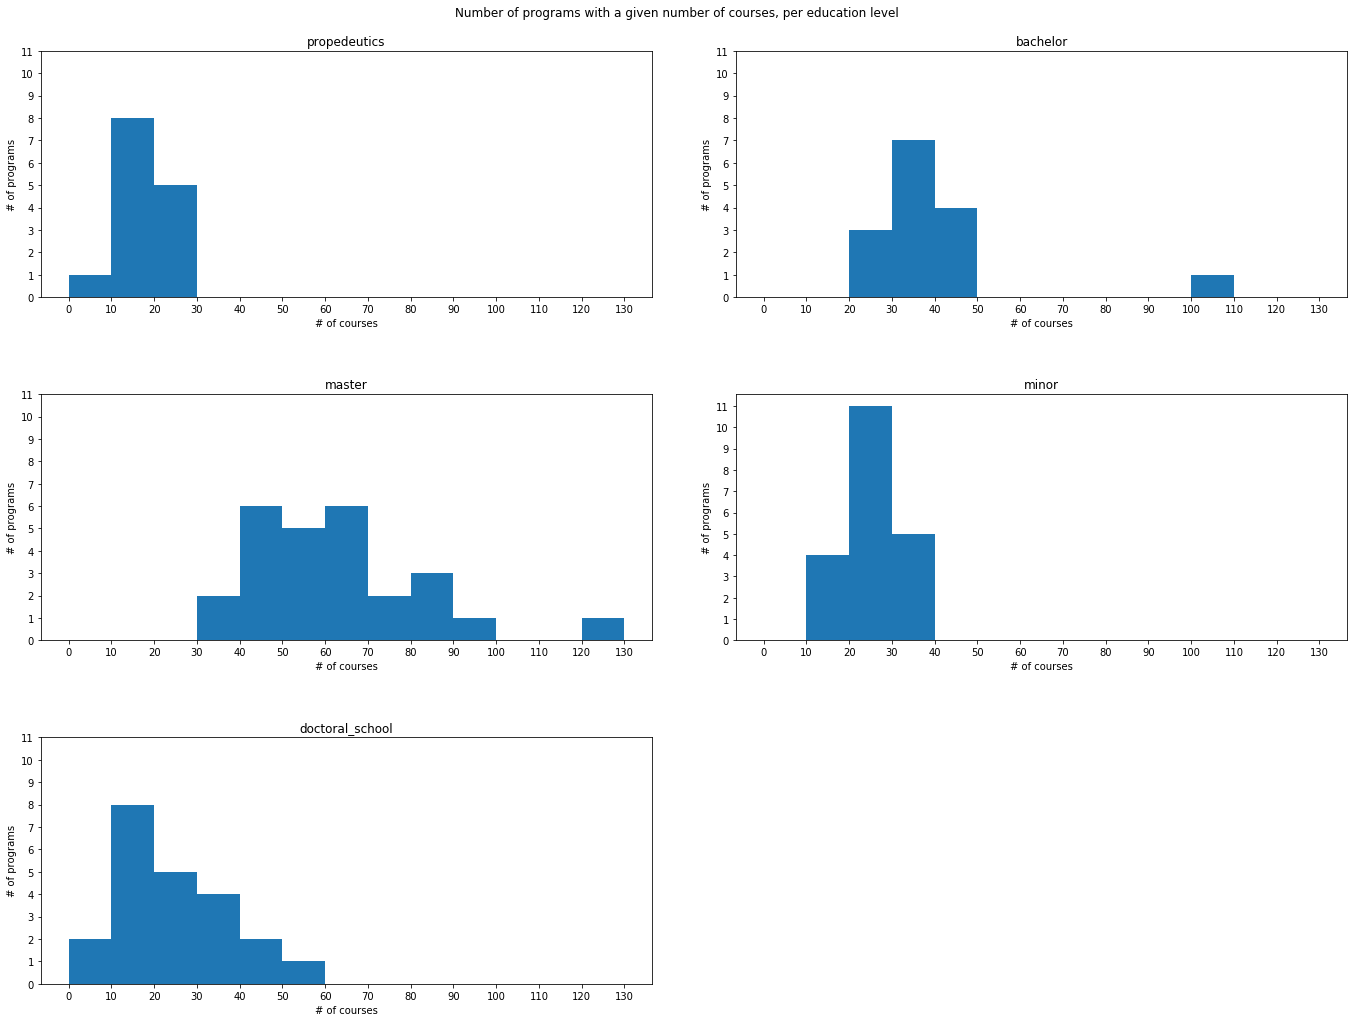

In [6]:
fig = plt.figure(figsize=(20, 15))

fig.suptitle('Number of programs with a given number of courses, per education level')

rows = 3
columns = 2

for i, level in enumerate(levels):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.hist(level_dict[level], bins=range(0,140,10))
    ax.set_title(level)
        
    ax.set_xticks(range(0,140,10))
    ax.set_yticks(range(12))
        
    ax.set_xlabel('# of courses')
    ax.set_ylabel('# of programs')
fig.tight_layout(pad=5.0)
plt.show()

There seems to be only two programs with >100 courses available - one in bachelor and one in master level. Let's check what they are!

In [7]:
program_counts['bachelor'][program_counts['bachelor']>90]

Humanities and Social Sciences Program    107
Name: bachelor, dtype: int64

In [8]:
program_counts['master'][program_counts['master']>120]

Electrical and Electronics Engineering    129
Name: master, dtype: int64

## Courses

In [9]:
courses.head(5)

,name,section,language,note,path,semester,exam_form,subject_examined,lecture,exercises,...,required,recommended,concepts,in_the_programs,prerequisite_for,project,number_of_places,practical_work,credits,labs
AR-126,Building technology II,AR,French,,/coursebook/en/building-technology-ii-AR-126?c...,Spring,Oral,Building technology II,3 Hour(s) per week x 12 weeks,2 Hour(s) per week x 12 weeks,...,[Technologie du bâti I (AR-125)Physique du bât...,[],[],"[[Architecture, Bachelor semester 2]]",[Technologie du bâti III],NaN,NaN,NaN,5,NaN
MATH-126,Geometry for architects II,AR,French,,/coursebook/en/geometry-for-architects-ii-MATH...,Spring,Written,Geometry for architects II,2 Hour(s) per week x 12 weeks,1 Hour(s) per week x 12 weeks,...,[],[Géométrie I],[],"[[Architecture, Bachelor semester 2], [Passere...",[],NaN,NaN,NaN,3,NaN
CIVIL-123,Structures II,GC,French,,/coursebook/en/structures-ii-CIVIL-123?cb_cycl...,Spring,During the semester,Structures II,2 Hour(s) per week x 12 weeks,1 Hour(s) per week x 12 weeks,...,[Structures I],[],[],"[[Architecture, Bachelor semester 2], [Civil E...",[Cours de structures et de conception des stru...,NaN,NaN,NaN,3,NaN
PHYS-118,Building physics,AR,French,,/coursebook/en/building-physics-PHYS-118?cb_cy...,Fall,Written,Building physics,4 Hour(s) per week x 12 weeks,2 Hour(s) per week x 12 weeks,...,[],[Mathématique et physique de niveau secondaire.],[Phénomènologie en physique du bâtiment.],"[[Architecture, Bachelor semester 1]]",[Technologie du bâti III.Théorie et critique d...,NaN,NaN,NaN,6,NaN
AR-125,Building technology I,AR,French,,/coursebook/en/building-technology-i-AR-125?cb...,Fall,Written,Building technology I,3 Hour(s) per week x 12 weeks,NaN,...,[],[],[],"[[Architecture, Bachelor semester 1]]",[],NaN,NaN,NaN,3,NaN


#### Distribution of exam forms:

In [10]:
courses['exam_form'].value_counts().to_frame().rename(columns={'exam_form': 'course_count'}, index={'': 'None'}).T

,During the semester,Written,Oral,Multiple,Oral presentation,Project report,Term paper,Written & Oral,None,Autre (reprise)
course_count,691,625,325,65,64,54,38,18,4,1


#### Number of courses with a given number of credits:

In [11]:
courses['credits'].fillna(0).astype(int).value_counts().sort_index().to_frame().rename(columns={'credits': 'count'}).T

,0,1,2,3,4,5,6,7,8,9,10,12,13,14,20,22,30
count,18,117,373,420,464,199,126,22,34,4,36,9,20,2,10,2,29


#### Distribution of the number of required courses per course 
(before preprocessing the 'required' column (which will mostly make the low counts higher due to non-separated lists of courses, as well as make the high counts lower due to descriptional requirements treated as required courses)

In [12]:
courses['required_count'] = courses.required.map(len)
courses.required_count.value_counts().sort_index().to_frame().T

,0,1,2,3,4,5,6,7,8,12
required_count,1172,554,87,37,25,4,3,1,1,1


The courses with more than 4 prerequisites:

In [13]:
pd.set_option('display.max_colwidth', None)
courses[courses.required_count > 4][['required_count', 'required']].sort_values(by=['required_count'], ascending=False)

,required_count,required
CIVIL-306,12,"[Mécanique des milieux continus (CIVIL-225), Mécanique des sols et écoulements souterrains (CIVIL-203), Mécanique des roches et ouvrages souterrains (CIVIL-304), Géologie (CIVIL-103), Mécanique des structures (CIVIL-223), Concepts importants à maîtriser, Mécanique des milieux continus déformables (cinématique, lois de conservations etc.), Genèse et nature des principales formations géologiques, Contraintes totales et effectives, sollicitations drainées / non-drainées, Ecoulements, potentiel hydraulique et pression d'eau, Théorie de l'élasticité; résistance au cisaillement et critère de Mohr-Coulomb, Calcul à la rupture, calcul de structures]"
MICRO-424,8,"[MICRO-420: Advanced optics, MICRO-421: Imaging optics, MICRO-422: Lasers and optics of nanostructures, MICRO-522: Integrated optics, MICRO-523: Optical radiation detection methods, MICRO-321 Optical engineering I, MICRO-321 Optical engineering II, MICRO-424: Optics laboratories I]"
CS-522,7,"[Principles of Computer Systems (POCS) is targeted at students who wish to acquire a deep understanding of computer system design orpursue research in systems. It is an intellectually challenging, fast paced course, in which mere survival requires a solid background in operating systems, databases, networking, programming languages, and computer architecture. The basic courses on these topics teach how the elemental parts of modern systems work - POCS picks up where the basic courses leave off and focuses on how the pieces come together to form useful, efficient systems. Todo well in POCS,a student must master the material of the following courses:, COM-208 Computer networks, CS-208 Computer architecture, CS-210 Functional programming, CS-305 Software engineering, CS-322 Introduction to database systems, CS-323 Introduction to operating systems]"
CS-305,6,"[Good Java programming skills, CS-108 Practice of Object-Oriented Programming, CS-210 Functional Programming, CS-206 Parallelism and concurrency, CS-207 System-oriented Programming, Students who do notmaster the material taught in the prerequisite courses prior to starting Software Engineering typically do not manage to pass the course.]"
ChE-408,6,"[Transport phenomena, Chemical kinetics, Thermodynamics, Chemical reaction engineering, Thermal safety of chemical processes, Separation processes]"
MGT-416,6,"[This course attempts to be as self contained as possible, but it does approach the topic from a quantitative point of view and, as such, students should be comfortable with the basics of (i.e.have taken at least one course in) the following topics before enrolling:, Statistics, Probability Theory, Linear Algebra, Calculus (integral and differential), As course work will be largely computational, experience with at least one programming language is also required.]"
ME-201,5,"[Linear algebra, Mechanics of structures I, Mechanics of structures II, Analysis III, Analysis IV]"
AR-401(c),5,"[UE N : Art et architecture: constructing the view I (Schaerer), De la structure à l'ornement (Picon), Visions et Utopies (Braghieri), Projets métaphoriques d'Archizoom à Koolhaas (Gargiani), Architecture et construction de la ville I (Gilot)]"
MSE-480,5,"[General physics;, General inorganic chemsitry;, Mathematical analysis:, Introduction to materials;, Thermodynamics;]"
CH-422,5,"[inorganic chemisrty, organic chemistry, organometallic chemistry, kinetics, catalysis]"


As we can see, MICRO-424 has the only properly formatted list of required courses. The other entries contain descriptional requirements or the mix of both. This it to be cleaned by us for the Milestone 2.

## Studyplans

In [14]:
pd.reset_option('display.max_colwidth')
studyplans

,Architecture,Chemistry and Chemical Engineering,Civil Engineering,Communication Systems,Computer Science,Electrical and Electronics Engineering,Environmental Sciences and Engineering,Humanities and Social Sciences Program,Life Sciences Engineering,Materials Science and Engineering,...,Management of technology (edoc),Materials Science and Engineering (edoc),Mathematics (edoc),Mechanics (edoc),Microsystems and Microelectronics (edoc),Molecular Life Sciences (edoc),Neuroscience (edoc),Photonics (edoc),Physics (edoc),"Robotics, Control and Intelligent Systems (edoc)"
propedeutics,/studyplan/en/propedeutics/architecture,/studyplan/en/propedeutics/chemistry-and-chemi...,/studyplan/en/propedeutics/civil-engineering,/studyplan/en/propedeutics/communication-systems,/studyplan/en/propedeutics/computer-science,/studyplan/en/propedeutics/electrical-and-elec...,/studyplan/en/propedeutics/environmental-scien...,/studyplan/en/propedeutics/humanities-and-soci...,/studyplan/en/propedeutics/life-sciences-engin...,/studyplan/en/propedeutics/materials-science-a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bachelor,/studyplan/en/bachelor/architecture,/studyplan/en/bachelor/chemistry-and-chemical-...,/studyplan/en/bachelor/civil-engineering,/studyplan/en/bachelor/communication-systems,/studyplan/en/bachelor/computer-science,/studyplan/en/bachelor/electrical-and-electron...,/studyplan/en/bachelor/environmental-sciences-...,/studyplan/en/bachelor/humanities-and-social-s...,/studyplan/en/bachelor/life-sciences-engineering,/studyplan/en/bachelor/materials-science-and-e...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
master,/studyplan/en/master/architecture,NaN,/studyplan/en/master/civil-engineering,NaN,/studyplan/en/master/computer-science,/studyplan/en/master/electrical-and-electronic...,/studyplan/en/master/environmental-sciences-an...,/studyplan/en/master/humanities-and-social-sci...,/studyplan/en/master/life-sciences-engineering,/studyplan/en/master/materials-science-and-eng...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doctoral_school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/studyplan/en/doctoral_school/management-of-te...,/studyplan/en/doctoral_school/materials-scienc...,/studyplan/en/doctoral_school/mathematics,/studyplan/en/doctoral_school/mechanics,/studyplan/en/doctoral_school/microsystems-and...,/studyplan/en/doctoral_school/molecular-life-s...,/studyplan/en/doctoral_school/neuroscience,/studyplan/en/doctoral_school/photonics,/studyplan/en/doctoral_school/physics,/studyplan/en/doctoral_school/robotics-control...


#### Distribution of programs available at a given level

In [15]:
(~studyplans.T.isnull()).sum().to_frame().rename(columns={0:'count'}).T

,propedeutics,bachelor,master,minor,doctoral_school
count,14,15,26,20,22
